# Goal: Given a head to head win probability for player 1, what's the probability that player 1 beats N others?

Seems straightforward at first. Say player 1 has a 50% win rate against one other player ($W_1 = 0.5, N = 1$). Then if there are 2 other players($W_1 = 0.5, N = 2$), the probability that player 1 beats them both is the probability that player 1 beats player 2 times the probability that player 1 beats player 3:

$$ W_2 = W_1 ^ N $$

$$ W_2 = 0.5 ^ 2 = 0.25 $$

On the other hand, if there are 3 players and they all have an equal chance of winning, then the probability that player 1 is the winner should be the same as the odds that player 2 is the winner, and the same probability that player 3 is the winner, so:

$$ W_2 = 1/N\ given\ W_1 = 0.5 $$

or maybe more generally something like:

$$ W_2 = 1/N * (2 * W_1) for N >= 1$$


In [4]:
# this gets us W_1 for some given set of cards known to player 1
from texas_hold_em_utils.hands import HandOfFive
from texas_hold_em_utils.deck import Deck


def rank_hand(hand, community_cards):
    """
    Ranks a hand of two cards and 3-5 five community cards relative to all other possible hands, based only on known cards
    :param hand: a list of 2 cards (Card objects)
    :param community_cards: a list of 3-5 cards (Card objects)
    :return: a tuple of the number of wins, losses, and ties for the given hand
    """
    player_hand = HandOfFive(hand, community_cards)
    deck1 = Deck()
    deck2 = Deck()
    wins = 0
    losses = 0
    ties = 0
    for card1 in deck1.cards:
        if card1 not in hand + community_cards:
            for card2 in deck2.cards:
                if card2 not in hand + community_cards and card2 != card1:
                    other_hand = HandOfFive([card1, card2], community_cards)
                    if player_hand > other_hand:
                        wins += 1
                    elif player_hand < other_hand:
                        losses += 1
                    else:
                        ties += 1
    return wins, losses, ties

In [5]:
# W_2 version
def rank_hand_against_2_players(hand, community_cards):
    player_hand = HandOfFive(hand, community_cards)
    deck1 = Deck()
    deck2 = Deck()
    deck3 = Deck()
    deck4 = Deck()
    wins = 0
    losses = 0
    ties = 0
    for card1 in deck1.cards:
        if card1 not in hand + community_cards:
            for card2 in deck2.cards:
                if card2 not in hand + community_cards and card2 != card1:
                    other_hand_1 = HandOfFive([card1, card2], community_cards)
                    for card3 in deck3.cards:
                        if card3 not in hand + community_cards and card3 != card1 and card3 != card2:
                            for card4 in deck4.cards:
                                other_hand_2 = HandOfFive([card3, card4], community_cards)
                                if player_hand > other_hand_1 and player_hand > other_hand_2:
                                    wins += 1
                                elif player_hand < other_hand_1 or player_hand < other_hand_2:
                                    losses += 1
                                else:
                                    ties += 1
    return wins, losses, ties

In [6]:
import pandas as pd

rnd_deck = Deck()
rnd_deck.shuffle()

hand = []
hand.append(rnd_deck.draw())
hand.append(rnd_deck.draw())
community_cards = []
community_cards.append(rnd_deck.draw())
community_cards.append(rnd_deck.draw())
community_cards.append(rnd_deck.draw())
community_cards.append(rnd_deck.draw())
community_cards.append(rnd_deck.draw())

print(hand, community_cards)
print(rank_hand(hand, community_cards))
print(rank_hand_against_2_players(hand, community_cards))

[<texas_hold_em_utils.card.Card object at 0x00000271C88C74D0>, <texas_hold_em_utils.card.Card object at 0x00000271C88C44D0>] [<texas_hold_em_utils.card.Card object at 0x00000271C88A5110>, <texas_hold_em_utils.card.Card object at 0x00000271C88C6C10>, <texas_hold_em_utils.card.Card object at 0x00000271C88C6750>, <texas_hold_em_utils.card.Card object at 0x00000271C88C6B90>, <texas_hold_em_utils.card.Card object at 0x00000271C88C5FD0>]
(1384, 584, 12)
(2092128, 2290240, 44912)


In [7]:
df = pd.DataFrame(columns=['wins_1', 'losses_1', 'ties_1', 'wins_2', 'losses_2', 'ties_2'])

for i in range(250):
    rnd_deck = Deck()
    rnd_deck.shuffle()

    hand = []
    hand.append(rnd_deck.draw())
    hand.append(rnd_deck.draw())
    community_cards = []
    community_cards.append(rnd_deck.draw())
    community_cards.append(rnd_deck.draw())
    community_cards.append(rnd_deck.draw())
    community_cards.append(rnd_deck.draw())
    community_cards.append(rnd_deck.draw())
    
    wins_1, losses_1, ties_1 = rank_hand(hand, community_cards)
    wins_2, losses_2, ties_2 = rank_hand_against_2_players(hand, community_cards)
    
    df = pd.concat([df, pd.DataFrame({'wins_1': [wins_1], 'losses_1': [losses_1], 'ties_1': [ties_1], 'wins_2': [wins_2], 'losses_2': [losses_2], 'ties_2': [ties_2]})])

In [8]:
df.to_csv('data/win_rate_vs_n_players.csv', index=False)

In [10]:
df['win_rate_1'] = ((df['wins_1'] * 2) + df['ties_1']) / ((df['wins_1'] + df['losses_1'] + df['ties_1']) *2)

In [11]:
df['win_rate_2'] = ((df['wins_2'] * 2) + df['ties_2']) / ((df['wins_2'] + df['losses_2'] + df['ties_2']) *2)

<Axes: xlabel='win_rate_1', ylabel='win_rate_2'>

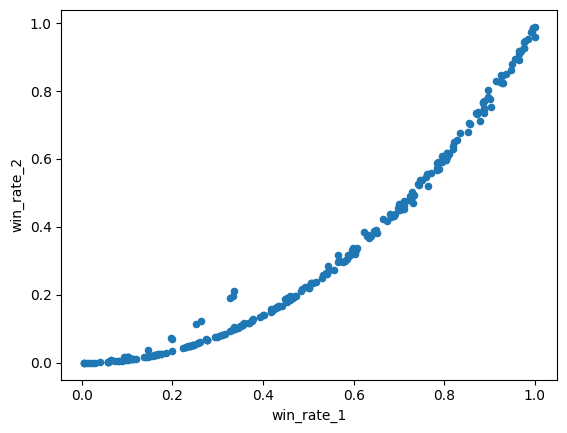

In [12]:
df.plot(x='win_rate_1', y='win_rate_2', kind='scatter')

In [13]:
df['win_rate_1'].corr(df['win_rate_2'])

0.9618075901027451

In [14]:
df['win_rate_1_sq'] = df['win_rate_1'] * df['win_rate_1']
df['win_rate_1_sq'].corr(df['win_rate_2'])

0.9982443433911925

In [15]:
df.head(40)

,wins_1,losses_1,ties_1,wins_2,losses_2,ties_2,win_rate_1,win_rate_2,win_rate_1_sq
0,1874,100,6,3801632,584416,41232,0.94798,0.86334,0.898666
0,1818,116,46,3498000,631608,297672,0.929798,0.823719,0.864524
0,1340,628,12,1916224,2468048,43008,0.679798,0.437679,0.462125
0,1666,142,172,3045312,685270,696698,0.884848,0.766534,0.782957
0,0,984,996,0,3413538,1013742,0.251515,0.114488,0.06326
0,482,1480,18,226648,4181316,19316,0.24798,0.053375,0.061494
0,1436,532,12,2201320,2179376,46584,0.728283,0.502478,0.530396
0,1332,496,152,1786656,2104112,536512,0.711111,0.464148,0.505679
0,976,1002,2,982784,3435168,9328,0.493434,0.223037,0.243477
0,856,1112,12,729152,3671312,26816,0.435354,0.167724,0.189533


<Axes: >

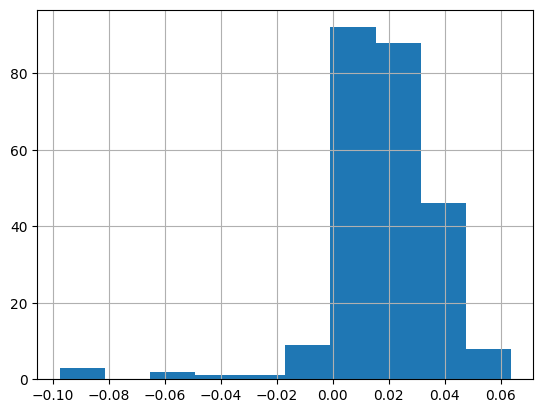

In [16]:
df['error'] = df['win_rate_1_sq'] - df['win_rate_2']
df['error'].hist()

# Conclusion

$W_N$ is approximated by $W_1^N$ 

Well... there could be some issue with the way I'm generating the numbers here. Maybe I should try a different method and see if I get the same results. 

Process:
1. Shuffle the deck
2. Get 2 random cards as a hand
3. Get 5 random community cards
4. Do 100 iterations of picking 2 random hands from the remaining cards
5. Record the expected 2 player win rate and the actual 3 player win rate
6. Do the same analysis as above

In [23]:
import copy

def rank_hand_against_2_player_samples(hand, community_cards, sample_size=100):
    deck = Deck()
    deck.remove(hand[0])
    deck.remove(hand[1])
    deck.remove(community_cards[0])
    deck.remove(community_cards[1])
    deck.remove(community_cards[2])
    deck.remove(community_cards[3])
    deck.remove(community_cards[4])
    
    wins = 0.0
    
    for i in range(sample_size):
        deck_cpy = copy.deepcopy(deck)
        deck_cpy.shuffle()
        
        hand_2 = [deck_cpy.draw(), deck_cpy.draw()]
        hand_3 = [deck_cpy.draw(), deck_cpy.draw()]
        
        hand_1_obj = HandOfFive(hand, community_cards)
        hand_2_obj = HandOfFive(hand_2, community_cards)
        hand_3_obj = HandOfFive(hand_3, community_cards)
        
        if hand_1_obj > hand_2_obj and hand_1_obj > hand_3_obj:
            wins += 1
        elif hand_1_obj == hand_2_obj and hand_1_obj == hand_3_obj:
            wins += 0.33333
        elif (hand_1_obj == hand_2_obj and hand_1_obj > hand_3_obj) or (hand_1_obj > hand_2_obj and hand_1_obj == hand_3_obj):
            wins += 0.5
            
    return wins/sample_size
        

In [17]:
import pandas as pd

rnd_deck = Deck()
rnd_deck.shuffle()

hand = []
hand.append(rnd_deck.draw())
hand.append(rnd_deck.draw())
community_cards = []
community_cards.append(rnd_deck.draw())
community_cards.append(rnd_deck.draw())
community_cards.append(rnd_deck.draw())
community_cards.append(rnd_deck.draw())
community_cards.append(rnd_deck.draw())

print(hand, community_cards)
print(rank_hand(hand, community_cards))
print(rank_hand_against_2_player_samples(hand, community_cards))

[<texas_hold_em_utils.card.Card object at 0x00000271C8887AD0>, <texas_hold_em_utils.card.Card object at 0x00000271C8885890>] [<texas_hold_em_utils.card.Card object at 0x00000271C7381910>, <texas_hold_em_utils.card.Card object at 0x00000271C8887110>, <texas_hold_em_utils.card.Card object at 0x00000271C7381A50>, <texas_hold_em_utils.card.Card object at 0x00000271C8886450>, <texas_hold_em_utils.card.Card object at 0x00000271C8887590>]
(0, 1834, 146)
0.065


In [25]:
import pandas as pd

df = pd.DataFrame(columns=['W_1', 'W_2'])

for i in range(1000):
    deck = Deck()
    deck.shuffle()
    hand = [deck.draw(), deck.draw()]
    community_cards = []
    community_cards.append(deck.draw())
    community_cards.append(deck.draw())
    community_cards.append(deck.draw())
    community_cards.append(deck.draw())
    community_cards.append(deck.draw())
    
    wins_1, losses_1, ties_1 = rank_hand(hand, community_cards)
    w_1 = (wins_1 + (0.5 * ties_1)) / (wins_1 + losses_1 + ties_1)
    w_2 = rank_hand_against_2_player_samples(hand, community_cards, sample_size=100)
    df = pd.concat([df, pd.DataFrame({'W_1': [w_1], 'W_2': [w_2]})])

C:\Users\amarl\AppData\Local\Temp\ipykernel_19752\1508088115.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'W_1': [w_1], 'W_2': [w_2]})])


In [ ]:
df.to_csv('data/win_rate_vs_n_players_v2.csv', index=False)

44

<Axes: xlabel='W_1', ylabel='W_2'>

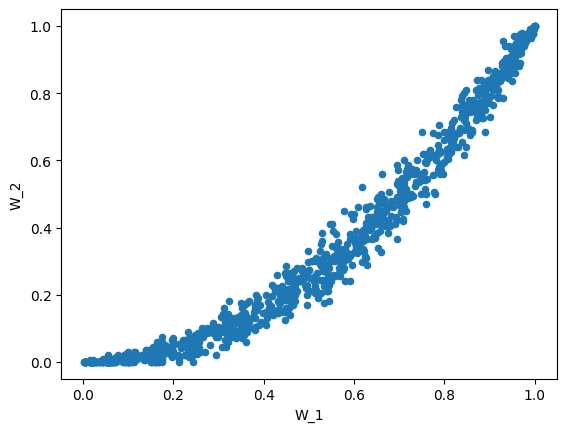

In [26]:
df.plot(x='W_1', y='W_2', kind='scatter')

In [27]:
df['W_1'].corr(df['W_2'])

0.9592602794523754

In [28]:
df['W_1_sq'] = df['W_1'] * df['W_1']
df['W_1_sq'].corr(df['W_2'])

0.9940245423292096

<Axes: >

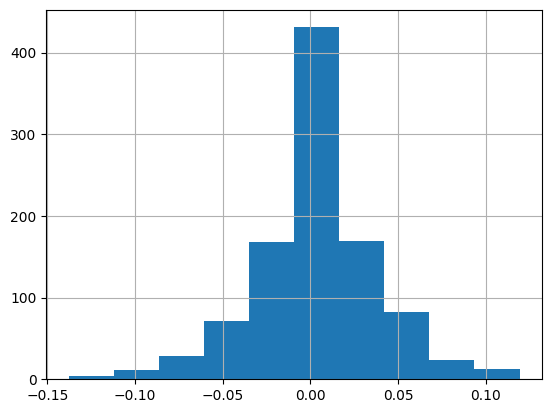

In [29]:
df['error'] = df['W_1_sq'] - df['W_2']
df['error'].hist()

High correlation with the error distribution being normal and centered around 0. perfect. the original work seems to be correct

It's far less expensive to do it this way, better try 4 and 5 to make sure the formula matches up

In [30]:
def rank_hand_against_player_samples(hand, community_cards, sample_size=100, num_other_players = 2):
    deck = Deck()
    deck.remove(hand[0])
    deck.remove(hand[1])
    deck.remove(community_cards[0])
    deck.remove(community_cards[1])
    deck.remove(community_cards[2])
    deck.remove(community_cards[3])
    deck.remove(community_cards[4])
    
    wins = 0.0
    
    for i in range(sample_size):
        deck_cpy = copy.deepcopy(deck)
        deck_cpy.shuffle()
        
        other_hands = []
        for j in range(num_other_players):
            other_hands.append([deck_cpy.draw(), deck_cpy.draw()])
        
        other_hands_obj = [HandOfFive(other_hand, community_cards) for other_hand in other_hands]
        
        hand_1_obj = HandOfFive(hand, community_cards)
        
        lost_to = []
        tied_with = []
        
        for hand_obj in other_hands_obj:
            if hand_obj > hand_1_obj:
                lost_to.append(hand_obj)
            elif hand_obj == hand_1_obj:
                tied_with.append(hand_obj)
                
        if len(lost_to) == 0:
            if len(tied_with) == 0:
                wins += 1
            else:
                wins += 1/(len(tied_with) + 1)
            
    return wins/sample_size

In [31]:
import pandas as pd

df = pd.DataFrame(columns=['W_1', 'W_2'])

for i in range(300):
    deck = Deck()
    deck.shuffle()
    hand = [deck.draw(), deck.draw()]
    community_cards = []
    community_cards.append(deck.draw())
    community_cards.append(deck.draw())
    community_cards.append(deck.draw())
    community_cards.append(deck.draw())
    community_cards.append(deck.draw())
    
    wins_1, losses_1, ties_1 = rank_hand(hand, community_cards)
    w_1 = (wins_1 + (0.5 * ties_1)) / (wins_1 + losses_1 + ties_1)
    w_2 = rank_hand_against_player_samples(hand, community_cards, sample_size=100)
    w_3 = rank_hand_against_player_samples(hand, community_cards, sample_size=100, num_other_players = 3)
    w_4 = rank_hand_against_player_samples(hand, community_cards, sample_size=100, num_other_players = 4)
    df = pd.concat([df, pd.DataFrame({'W_1': [w_1], 'W_2': [w_2], 'W_3': [w_3], 'W_4': [w_4]})])

C:\Users\amarl\AppData\Local\Temp\ipykernel_19752\3457769102.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'W_1': [w_1], 'W_2': [w_2], 'W_3': [w_3], 'W_4': [w_4]})])


In [32]:
df['W_1_sq'] = df['W_1'] * df['W_1']
df['W_1_cu'] = df['W_1'] * df['W_1'] * df['W_1']
df['W_1_qu'] = df['W_1'] * df['W_1'] * df['W_1'] * df['W_1']
print(df['W_1_sq'].corr(df['W_2']))
print(df['W_1_cu'].corr(df['W_3']))
print(df['W_1_qu'].corr(df['W_4']))

0.9937286343133435
0.994023862174392
0.9936367424561481


<Axes: >

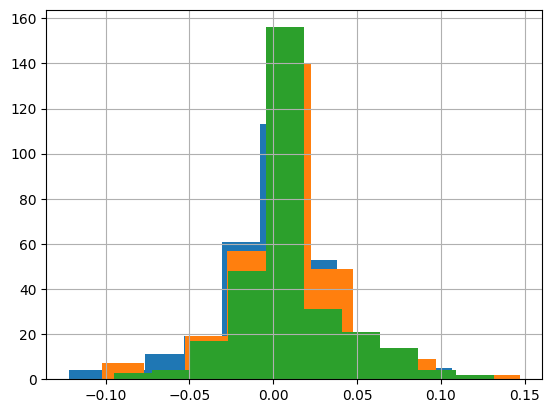

In [34]:
df['error_2'] = df['W_1_sq'] - df['W_2']
df['error_3'] = df['W_1_cu'] - df['W_3']
df['error_4'] = df['W_1_qu'] - df['W_4']

df['error_2'].hist()
df['error_3'].hist()
df['error_4'].hist()

Not gonna get much more definitive than that. $W_N$ is approximated by $W_1^N$ 